# **DUYGU TANIMA**
---
[<img align="right" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)


**Colab** için kimlik doğrulama adımları:

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Kütüphane Kurulumu

In [21]:
!ls '/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/'

data  DuyguTanima_Demo1.ipynb  DuyguTanima_Demo2.ipynb	images	utils


In [0]:
!pip3 install -q keras

**Gerekli paketler yükleniyor...**

In [24]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


**Google Drive** içinde ve doğru klasörde bulunmamız için gereken ve kontrol adımları:

In [26]:
!ls '/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/'

data  DuyguTanima_Demo1.ipynb  DuyguTanima_Demo2.ipynb	images	utils


In [29]:
import os
os.chdir("/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/")
!pwd

/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima


**Tanımlamalar:**

In [32]:
root = '/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/'
#------------------------------
#değişkenler
#test_img_path = root + "images/test5.jpg"
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral - sinirli, iğrenmiş, korku, mutlu, üzgün, şaşkın, doğal
batch_size = 256
epochs = 5


with open(root + "data/fer2013/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
# Eğitim seti ve test seti ilklendirme
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
# Test ve eğitim verisinin transfer edilmesi
for i in range(1,num_of_instances):
    
    emotion, img, usage = lines[i].split(",")
      
    val = img.split(" ")
        
    pixels = np.array(val, 'float32')
        
    emotion = keras.utils.to_categorical(emotion, num_classes)
    
    if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
    elif 'PublicTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)

#------------------------------
# Eğtitim ve test kümelerinin diziye tranformasyonu
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 # [0, 1] aralığına normalize etme işlemi
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


#------------------------------
#Evrişimli Sinir Ağı Mimarisini Oluşturma
model = Sequential()

#1. evrişim katmanı
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2. Evrişim katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3. Evrişim katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

# Tam bağlantı katmanı
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#Batch (Küme) işlemleri
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

fit = False #Train etmek için fit=True olarak değiştiriniz.

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #Tüm veri kümesi için eğit
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #rastgele bir eğtiim yap
else:
	model.load_weights(root + 'data/facial_expression_model_weights.h5') #Öğrenilmiş ağırlıkları yükle
	

number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Drive da bulunduğumuz klasörün içindeki test görüntülerimizin dosya isimlerini görelim ve test işlemi için bu görselleri çağıralım**

In [33]:
import os
os.chdir("/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/")
!pwd

/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima


In [34]:
!ls images

bb1.jpg      javierbardem2.jpg	lotr2.jpg	  test4.jpg  yuz2.jpg
bb2.jpg      javierbardem.jpg	lotr3.jpg	  test5.jpg  yuz3.jpg
brando.png   kemal_sunal2.jpg	robertdeniro.jpg  test6.jpg
emojis	     kemal_sunal.jpg	test2.jpg	  test.jpg
hababam.jpg  lotr1.png		test3.jpg	  yuz1.jpg


**Bir test resmi yükleyelim**

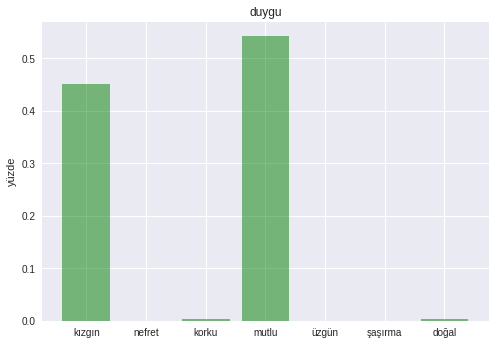

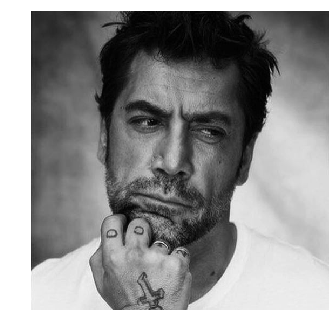

In [0]:
test_img_path = root + "images/javierbardem.jpg"

img_orj = image.load_img(test_img_path)
img = image.load_img(test_img_path, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#Duygu Analizi(custom[0])


#1
objects = ('kızgın', 'nefret', 'korku', 'mutlu', 'üzgün', 'şaşırma', 'doğal')
y_pos = np.arange(len(objects))
    
plt.bar(y_pos, custom[0], align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('yüzde')
plt.title('duygu')
plt.show()

#2
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.axis('off')
plt.gray()
plt.imshow(img_orj)

plt.show()
#------------------------------
